# Preliminary Analysis
Cici

### Data Cleaning

In [49]:
import pandas as pd
import numpy as np

In [35]:
data = pd.read_csv("amazon.csv")

In [36]:
da = data[["category", 
          "discounted_price", 
          "actual_price", 
          "discount_percentage", 
          "rating", 
          "rating_count", 
          "user_id"]]

In [37]:
for col in ["discounted_price", "actual_price"]:
    da[col] = da[col].str.replace("₹", "")
    da[col] = da[col].str.replace(",", "")
    
da["discount_percentage"] = da["discount_percentage"].str.replace("%", "")

da[["discounted_price", "actual_price", "discount_percentage", "rating", 
    "rating_count"]] = da[["discounted_price", "actual_price", "discount_percentage", "rating", 
    "rating_count"]].apply(pd.to_numeric, errors='coerce')

/tmp/ipykernel_249/3239386276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da[col] = da[col].str.replace("₹", "")
/tmp/ipykernel_249/3239386276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da[col] = da[col].str.replace(",", "")
/tmp/ipykernel_249/3239386276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [5]:
da.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id
0,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,NaN,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,NaN,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,NaN,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,NaN,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,NaN,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."


### Glimpse of Data

- Product Category

For products that fall into the exact same category, there are not many varieties. 
A typical count would be <3.

In [6]:
da.groupby("category").count().describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,6.943128,6.943128,6.943128,6.938389,1.545024,6.943128
std,18.717870,18.717870,18.717870,18.717728,5.297044,18.717870
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
75%,6.000000,6.000000,6.000000,6.000000,1.000000,6.000000
max,233.000000,233.000000,233.000000,233.000000,59.000000,233.000000


**!!! Solution 1**

To deal with that, one strategy may be only performing analysis on products that have more varieties.
However, 
1) the count drops rapidly, 
2) Cici is not sure if ~50 products is sufficient to do any analysis

In [7]:
da.groupby("category").count().nlargest(10, "discounted_price")

,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id
category,,,,,,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233,233,233,233,59,233
Electronics|WearableTechnology|SmartWatches,76,76,76,76,13,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68,68,68,68,5,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63,63,63,63,8,63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52,52,52,52,2,52
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49,49,49,49,38,49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27,27,27,27,3,27
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24,24,24,24,1,24
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",24,24,24,24,6,24


!!! **Solution 2**

Alternatively, we could elevate the categorical level, i.e. to amalgamate multiple branches into one big category.

This usually means only keeping the first 1-2 big categories.

In terms of coding, I came up with possible ways (the first one seems to be easier):

1) "Electronics" `in` category's name (see tentative code below)

advantage: it is doable and provides considerable observations for one category

drawback: it requires some way to identify the number of large categories (may need to do parsing in 2).

2) parsing "..|..|.." format

drawback: google how to do it

In [8]:
def electronics(a):
    return "Electronics" in a

all_electronics = da["category"].apply(electronics)
da[all_electronics].count()

category               530
discounted_price       530
actual_price           530
discount_percentage    530
rating                 530
rating_count            97
user_id                530
dtype: int64

In [9]:
def homekitchen(a):
    return "Home&Kitchen|Kitchen&HomeAppliances" in a

all_home_kitchen = da["category"].apply(homekitchen)
da[all_home_kitchen].count()

category               308
discounted_price       308
actual_price           308
discount_percentage    308
rating                 307
rating_count            92
user_id                308
dtype: int64

- Experience of Users

If we want to do an analysis based on users (e.g, experienced users tend to rate higher for the products), it would be difficult.
As from the table, the mean and median are around 1 - a typical user only rate one product in this dataset.

In [10]:
da.groupby("user_id").count().describe()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,1.226968,1.226968,1.226968,1.226968,1.226131,0.273032
std,0.772262,0.772262,0.772262,0.772262,0.773050,0.497261
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000


### Regression Model

#### Simple Regression

In [18]:
from sklearn import linear_model
import seaborn as sns

In [29]:
lr_model = linear_model.LinearRegression

In [54]:
lr_model.fit(X = da[da.notnull().all(1)][['discount_percentage']], 
             y = da[da.notnull().all(1)][['rating']])
beta_0 = lr_model.intercept_
beta_1 = lr_model.coef_[0]
print(f"Fit model: rating = {beta_0} + {beta_1} discount_percentage")

Fit model: rating = [4.04304432] + [-0.00103665] discount_percentage


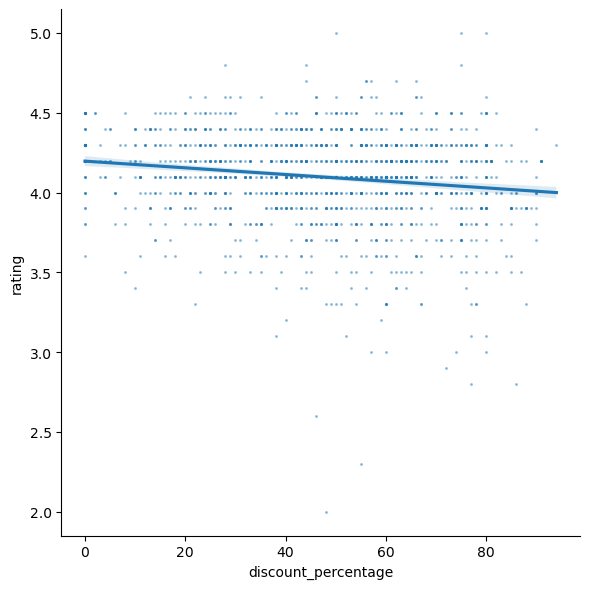

In [57]:
sns.lmplot(
    data=da, x="discount_percentage", y="rating", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
);

### Multiple Regression
Which category that the product falls into may impact our analysis result. To investigate this effect, we may add a specification where take "categorization" as control. To do this, one has to first do one-hot encoding (i.e., transforming it into dummies).

In [59]:
pd.get_dummies(da["category"]).shape[0]

1465

However, it is unrealistic to transform each category, or we will get 1465 dummy variables. Instead, depending on how we categorize (previous section), we will result in fewer dummies.